## HW 5: Logistic Regression
Noemi Turner <br>
CPSC 323 <br>
Professor Morehead <br>
10/6/2022 <br>
Description: This project practices using Logistic Regression

# Possum Dataset
**Background:** This possum dataset "...consists of nine morphometric measurements on each of 104 ***mountain brushtail possums***, trapped at seven sites from ***Southern Victoria*** to central ***Queensland***.

**Link:** https://www.kaggle.com/datasets/abrambeyer/openintro-possum

**Total Number of Instances:** 101 (I removed rows 41, 44, and 46 because there were NA values)

**Attributes:**


*   ***case*** - Observation number
*   ***site*** - The site number where the possum was trapped
*   ***Pop*** - Population, either Vic (Victoria) or other (New South Wales or Queensland)
*   ***sex*** - Gender, either m (male) or f (female)
*   ***age*** - age
*   ***hdlngth*** - Head length, in mm.
*   ***skullw*** - Skull width, in mm.
*   ***totlngth*** - Total length, in cm.
*   ***taill*** - Tail length, in cm.
*   ***footlgth*** - foot length
*   ***earconch*** - ear conch length
*   ***eye*** - distance from medial canthus to lateral canthus of right eye
*   ***chest*** - chest girth (in cm)
*   ***belly*** - belly girth (in cm)

**Header:** 

```
['case', 'site', 'Pop', 'sex', 'age', 'hdlngth', 'skullw', 'totlngth', 'taill', 'footlgth', 'earconch', 'eye', 'chest', 'belly']

```



In [ ]:
# Mount data from drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Load in the data from possom.csv

In [ ]:
import copy
import csv
from tabulate import tabulate # uncomment if you want to use the pretty_print() method

class MyPyTable:
    """Represents a 2D table of data with column names.

    Attributes:
        column_names(list of str): M column names
        data(list of list of obj): 2D data structure storing mixed type data.
            There are N rows by M columns.
    """

    def __init__(self, column_names=None, data=None):
        """Initializer for MyPyTable.

        Args:
            column_names(list of str): initial M column names (None if empty)
            data(list of list of obj): initial table data in shape NxM (None if empty)
        """
        if column_names is None:
            column_names = []
        self.column_names = copy.deepcopy(column_names)
        if data is None:
            data = []
        self.data = copy.deepcopy(data)

    def pretty_print(self):
        """Prints the table in a nicely formatted grid structure.
        """
        print(tabulate(self.data, headers=self.column_names))

    def get_shape(self):
        """Computes the dimension of the table (N x M).

        Returns:
            int: number of rows in the table (N)
            int: number of cols in the table (M)
        """
        num_rows = len(self.data)
        num_columns = len(self.column_names)
        return num_rows, num_columns

    def get_column(self, col_identifier, include_missing_values=True):
        """Extracts a column from the table data as a list.

        Args:
            col_identifier(str or int): string for a column name or int
                for a column index
            include_missing_values(bool): True if missing values ("NA")
                should be included in the column, False otherwise.

        Returns:
            list of obj: 1D list of values in the column

        Notes:
            Raise ValueError on invalid col_identifier
        """
        
        try:
            col_index = self.column_names.index(col_identifier)
        except ValueError:
            raise ValueError("ValueError exception thrown")

        # Include missing values
        if(include_missing_values == True):
            col = []
            for row in self.data:
                value = row[col_index]
                col.append(value)
            return col 
        else: # Don't include missing values
            col = []
            for row in self.data:
                value = row[col_index]
                if value != "NA":
                    col.append(value)
            return col 

    def convert_to_numeric(self):
        """Try to convert each value in the table to a numeric type (float).

        Notes:
            Leave values as is that cannot be converted to numeric.
        """
        for row in self.data:  
            for value in range(len(row)):
                try:
                    numeric_value = float(row[value])
                    # success
                    row[value] = numeric_value
                except ValueError:
                    exception = "exception"

    def load_from_file(self, filename):
        """Load column names and data from a CSV file.

        Args:
            filename(str): relative path for the CSV file to open and load the contents of.

        Returns:
            MyPyTable: return self so the caller can write code like
                table = MyPyTable().load_from_file(fname)

        Notes:
            Use the csv module.
            First row of CSV file is assumed to be the header.
            Calls convert_to_numeric() after load
        """
        with open(filename, encoding="utf8") as f:
            csv_reader = csv.reader(f) 
            for line_no, line in enumerate(csv_reader, 1):
                if line_no == 1: 
                    self.column_names = line # header
                else:
                    self.data.append(line)
        # convert numeric values
        self.convert_to_numeric()
        return self

In [ ]:
table = MyPyTable().load_from_file('/content/gdrive/MyDrive/Colab Notebooks/possum.csv')
table.pretty_print()

#Split the data into training and test sets

In [ ]:
def convert_to_binary_values(sex_of_possum_column):
    """
    Helper function to change the column of string values 
    into binary values ("m" to 0s and "f" to 1s)
    
    Input: takes a list of strings
    Output: returns a new list of int values
    """
    new_list = []
    for element in sex_of_possum_column:
        if element == "m":
            new_list.append(0)
        elif element == "f":
            new_list.append(1)
    return new_list

Create Y  <br>
It holds the values of the sexes of the possums in the dataset

In [ ]:
import numpy as np # used to create numpy arrays

# grab the column that has the sex of each possum from the table and convert to binary values
sex_of_possums = convert_to_binary_values(table.get_column("sex"))

Y = np.array(sex_of_possums) # convert to a numpy array and store as our Y values

Create X <br>
It will consist rows that have age, head length, total length, and tail length data from each possum in the dataset

In [ ]:
X_header = [table.column_names[4], table.column_names[5],table.column_names[7], table.column_names[8]]

x_data = []
for row in table.data:
    new_row = []
    new_row.append(row[4])
    new_row.append(row[5])
    new_row.append(row[7])
    new_row.append(row[8])
    x_data.append(new_row)

print(X_header)

X = np.array(x_data)

['age', 'hdlngth', 'totlngth', 'taill']


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33)

# Sklearn Logistic Regression 
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

C = 1.0  ->  It's the regularization parameter (how steep the line is)

In [ ]:
from sklearn.linear_model import LogisticRegression

# resources: https://www.datacamp.com/tutorial/understanding-logistic-regression-python

# instantiate the model (using the default parameters)
model = LogisticRegression(C=1.0)

In [ ]:
# fit the model with data
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# Predict
y_pred = model.predict(X_test)

print(y_pred)
print(y_test)

[1 0 1 0 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 1 0 1 1 0 1 1 0 0 0 1 0 0 1 0]
[1 0 1 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0]


# Analysis

Confusion Matrix

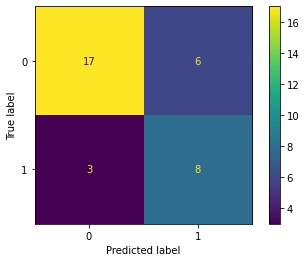

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[0,1])
disp.plot()
plt.show()

Accuracy

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
accuracy = (tp + tn) / (tp + tn + fp + fn) 
print("Accuracy:", accuracy) 

Accuracy: 0.7352941176470589


Precision

In [ ]:
precision = tp / (tp + fp)
print("Precision:", precision)

Precision: 0.5714285714285714


Recall

In [ ]:
recall = tp /(tp + fn)
print("Recall:", recall)

Recall: 0.7272727272727273


F1 Score

In [ ]:
f1_score = 2 * (precision * recall) / (precision + recall)
print("F1 Score:", f1_score)

F1 Score: 0.64


Speed of the logistic regression model

In [ ]:
import time
startTime = time.time()

# fit the model with data
model.fit(X_train, y_train)
# Predict
y_pred = model.predict(X_test)


executionTime = (time.time() - startTime)
print('Execution time in seconds: ' + str(executionTime))

Execution time in seconds: 0.025513887405395508


Plot using matplotlib

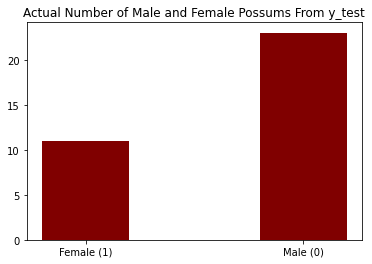

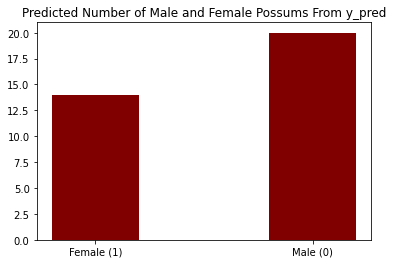

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# y_test sex of possums graph
actual_num_female_possums = y_test.tolist().count(1)
actual_num_male_possums = y_test.tolist().count(0)

actual_num_possums = [actual_num_female_possums, actual_num_male_possums]

# creating the bar plot
plt.bar(["Female (1)", "Male (0)"], actual_num_possums, color ='maroon', width = 0.4)
plt.title("Actual Number of Male and Female Possums From y_test")
plt.show()

# y_pred sex of possums graph
pred_num_female_possums = y_pred.tolist().count(1)
pred_num_male_possums = y_pred.tolist().count(0)

pred_num_possums = [pred_num_female_possums, pred_num_male_possums]

# creating the bar plot
plt.bar(["Female (1)", "Male (0)"], pred_num_possums, color ='maroon', width = 0.4)
plt.title("Predicted Number of Male and Female Possums From y_pred")
plt.show()

From these graphs, it appears that my Possum Logistic Regression Predictor tends to favor choosing the sex of the possum to be Female based on the data it's trained and tested on. 